In [12]:
from NSGAII import NSGA2
import moo as mtp
from LoadData import read_datas_from_Mulan
import numpy as np

# Load data from the MULAN database
DatasetName = input("Please enter the dataset name: ")
Data = read_datas_from_Mulan(DatasetName) #scene - emotions
num_features = Data[0].shape[1]


scene:undivided - exists, not redownloading


In [13]:
# Problem Definition
problem = {
    'cost_function': lambda solution: mtp.feature_selection_objectives(solution, Data),
    'n_var': Data[0].shape[1] # Number of Decision Variables
}


# Initialize Algorithm
alg = NSGA2(
    max_iter = 100, #Maximum Number of Iterations
    pop_size = 30, # Population Size
    p_crossover = 0.7, # Crossover Percentage
    # alpha = 0.1,
    p_mutation = 1/num_features,
    mu = 0.05,
    verbose = True,
)

# Solve the Problem
results = alg.run(problem)
pop = results['pop']
F = results['F']

Number of Objective Functions:  2
Iteration 1: Number of Pareto Members = 2
Iteration 2: Number of Pareto Members = 3
Iteration 3: Number of Pareto Members = 3
Iteration 4: Number of Pareto Members = 5
Iteration 5: Number of Pareto Members = 6
Iteration 6: Number of Pareto Members = 8
Iteration 7: Number of Pareto Members = 8
Iteration 8: Number of Pareto Members = 7
Iteration 9: Number of Pareto Members = 4
Iteration 10: Number of Pareto Members = 3
Iteration 11: Number of Pareto Members = 4
Iteration 12: Number of Pareto Members = 7
Iteration 13: Number of Pareto Members = 8
Iteration 14: Number of Pareto Members = 9
Iteration 15: Number of Pareto Members = 7
Iteration 16: Number of Pareto Members = 8
Iteration 17: Number of Pareto Members = 10
Iteration 18: Number of Pareto Members = 9
Iteration 19: Number of Pareto Members = 9
Iteration 20: Number of Pareto Members = 9


In [18]:
results

{'pop': [{'position': array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
          1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
          1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
          0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
          0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
          1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
          0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
          1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
          1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
          0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
          1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
          0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
          1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,

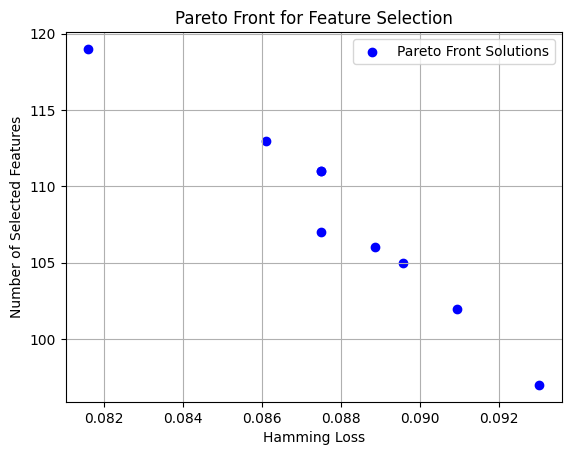

In [15]:
# Plot Results
import numpy as np
import matplotlib.pyplot as plt

pf_costs = np.array([pop[i]['cost'] for i in F[0]])

# Plotting
plt.scatter(pf_costs[:, 0], pf_costs[:, 1], color='blue', label='Pareto Front Solutions')
plt.title('Pareto Front for Feature Selection')
plt.xlabel('Hamming Loss')
plt.ylabel('Number of Selected Features')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Prepare data for saving
data_to_save = "Final Population:\n"
for individual in pop:
    data_to_save += f"Position: {individual['position']}, Cost: {individual['cost']}\n"

data_to_save += "\nPareto Fronts:\n"
for front in F:
    data_to_save += f"{front}\n"

# Open a file in write mode
with open('results.txt', 'w') as file:
    # Write the prepared data to the file
    file.write(data_to_save)
